In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rockyou-6-digit/DD-6-digit-291000.txt


In [3]:
string_pool = None
with open('/kaggle/input/rockyou-6-digit/DD-6-digit-291000.txt') as f:
    string_pool = f.readlines()
string_pool = list(map(lambda x:x.replace('\n',''),string_pool))
string_pool[:10]

['123456',
 '654321',
 '111111',
 '000000',
 '123123',
 '666666',
 '121212',
 '112233',
 '789456',
 '159753']

In [27]:
total_digit = 0
transition_mat = [[0 for _ in range(10)] for _ in range(10)]
for pin in string_pool:
    for i in range(0,len(pin)-1):
        transition_mat[int(pin[i])][int(pin[i+1])]+=1
    total_digit+=len(pin)


In [28]:
transition_mat

[[26946, 24482, 21934, 18945, 17588, 18543, 18060, 17673, 19617, 17739],
 [29101, 28865, 29002, 19870, 19306, 18912, 16447, 16151, 17894, 23732],
 [24146, 25249, 23123, 18902, 18521, 21617, 17583, 15593, 17359, 15280],
 [20782, 19986, 17080, 13136, 9318, 11328, 10869, 8434, 9008, 8572],
 [14465, 15727, 14404, 10334, 9755, 11444, 9590, 8878, 10129, 8426],
 [15913, 16458, 16629, 11543, 10908, 12194, 12924, 9051, 11141, 9627],
 [14663, 14685, 13518, 10242, 8659, 10398, 10887, 8896, 10260, 11682],
 [13304, 14012, 12066, 8154, 8557, 8789, 8260, 11218, 13173, 10149],
 [14804, 14582, 13619, 9714, 9947, 11669, 11276, 12005, 15038, 14253],
 [16747, 16037, 13615, 9821, 8597, 9869, 10203, 9403, 12437, 13559]]

In [6]:
sum_ = sum([sum(transition_mat[i]) for i in range(10)])

In [32]:
transition_mat_np = np.array(transition_mat,dtype=np.float)
for i in range(10):
    transition_mat_np[i] = transition_mat_np[i]/transition_mat_np[i].sum()

/tmp/ipykernel_32/3841988337.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  transition_mat_np = np.array(transition_mat,dtype=np.float)


In [33]:
transition_mat_np

array([[0.13370913, 0.12148248, 0.10883901, 0.09400725, 0.08727367,
        0.09201248, 0.08961578, 0.08769545, 0.0973418 , 0.08802294],
       [0.1327116 , 0.13163535, 0.13226012, 0.09061474, 0.08804269,
        0.0862459 , 0.07500456, 0.07365469, 0.08160343, 0.10822692],
       [0.1223369 , 0.1279253 , 0.11715382, 0.09576791, 0.09383756,
        0.10952359, 0.08908513, 0.0790027 , 0.08795023, 0.07741687],
       [0.16171127, 0.15551734, 0.13290484, 0.10221534, 0.07250628,
        0.08814672, 0.0845751 , 0.0656276 , 0.07009408, 0.06670142],
       [0.12783689, 0.13899003, 0.12729779, 0.09132848, 0.08621147,
        0.10113829, 0.08475325, 0.07846083, 0.08951676, 0.0744662 ],
       [0.12590594, 0.13021806, 0.13157104, 0.09132987, 0.08630566,
        0.09648068, 0.10225654, 0.07161281, 0.08814919, 0.07617021],
       [0.12874704, 0.12894021, 0.11869348, 0.08992888, 0.0760295 ,
        0.09129862, 0.09559224, 0.07811046, 0.09008693, 0.10257266],
       [0.12354897, 0.13012388, 0.1120521

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

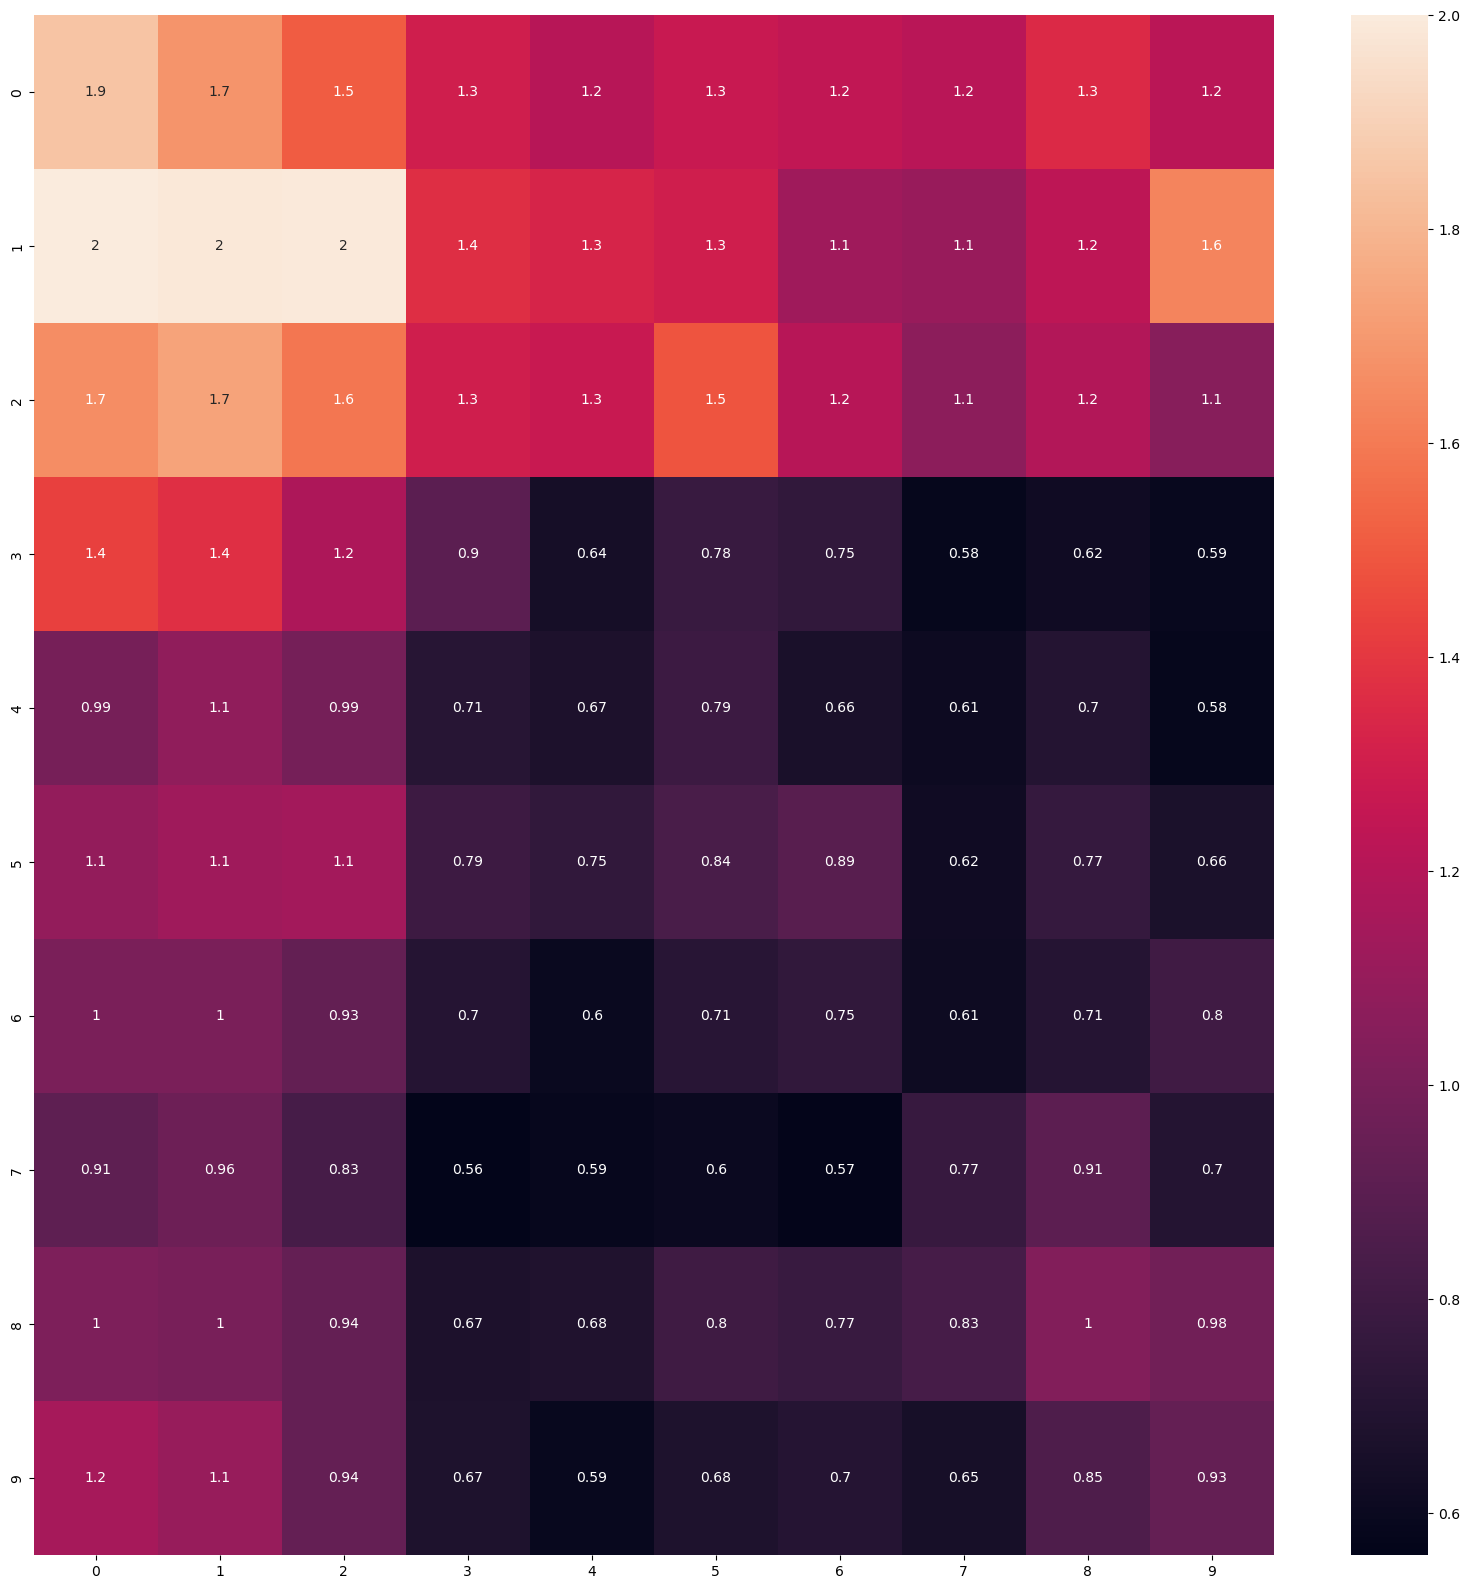

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap((transition_mat_np/sum_)*100,annot=True)

In [9]:
occurences = dict()
for pin in string_pool:
    for i in range(0,len(pin)-1):
        if pin[i] in occurences:
            occurences[pin[i]]+=1
        else:
            occurences[pin[i]]=1
occurences

{'1': 219280,
 '2': 197373,
 '3': 128513,
 '4': 113152,
 '5': 126388,
 '6': 113890,
 '0': 201527,
 '7': 107682,
 '8': 126907,
 '9': 120288}

In [17]:
occurences=sorted(occurences.items())

In [18]:
distribution = np.array([y for x,y in occurences])
distribution=distribution/distribution.sum()

In [19]:
distribution

array([0.13850653, 0.1507079 , 0.13565155, 0.08832509, 0.0777677 ,
       0.0868646 , 0.07827491, 0.07400825, 0.08722131, 0.08267216])

In [23]:
digits_to_guess = 6
guessed_pass = ''
while digits_to_guess >0:
    digit = np.random.choice(range(10),p=distribution)
    digit = str(digit)
    guessed_pass+=digit
    digits_to_guess-=1
guessed_pass

'518828'

In [74]:
pass_ = '99221101'

In [77]:
test_data = []
for test in range(1):
    guessed_pass = ''
    counter  =1
    while guessed_pass!=pass_:
        digits_to_guess = len(pass_)
        guessed_pass = ''
        digit = np.random.choice(list(range(10)),p=distribution)
        guessed_pass+=str(digit)
        while digits_to_guess-1 >0:
            digit = np.random.choice(range(10),p=transition_mat_np[digit])
            guessed_pass+=str(digit)
            digits_to_guess-=1
        #print(guessed_pass,"| Attempt",counter)
        counter+=1
    test_data.append(counter)

In [76]:
print(f'After 100 sampling avg attempt to guess the password was {sum(test_data)/len(test_data)}, shortest was {min(test_data)} and longest was {max(test_data)}')

ZeroDivisionError: division by zero

In [ ]:
plt.plot(test_data)